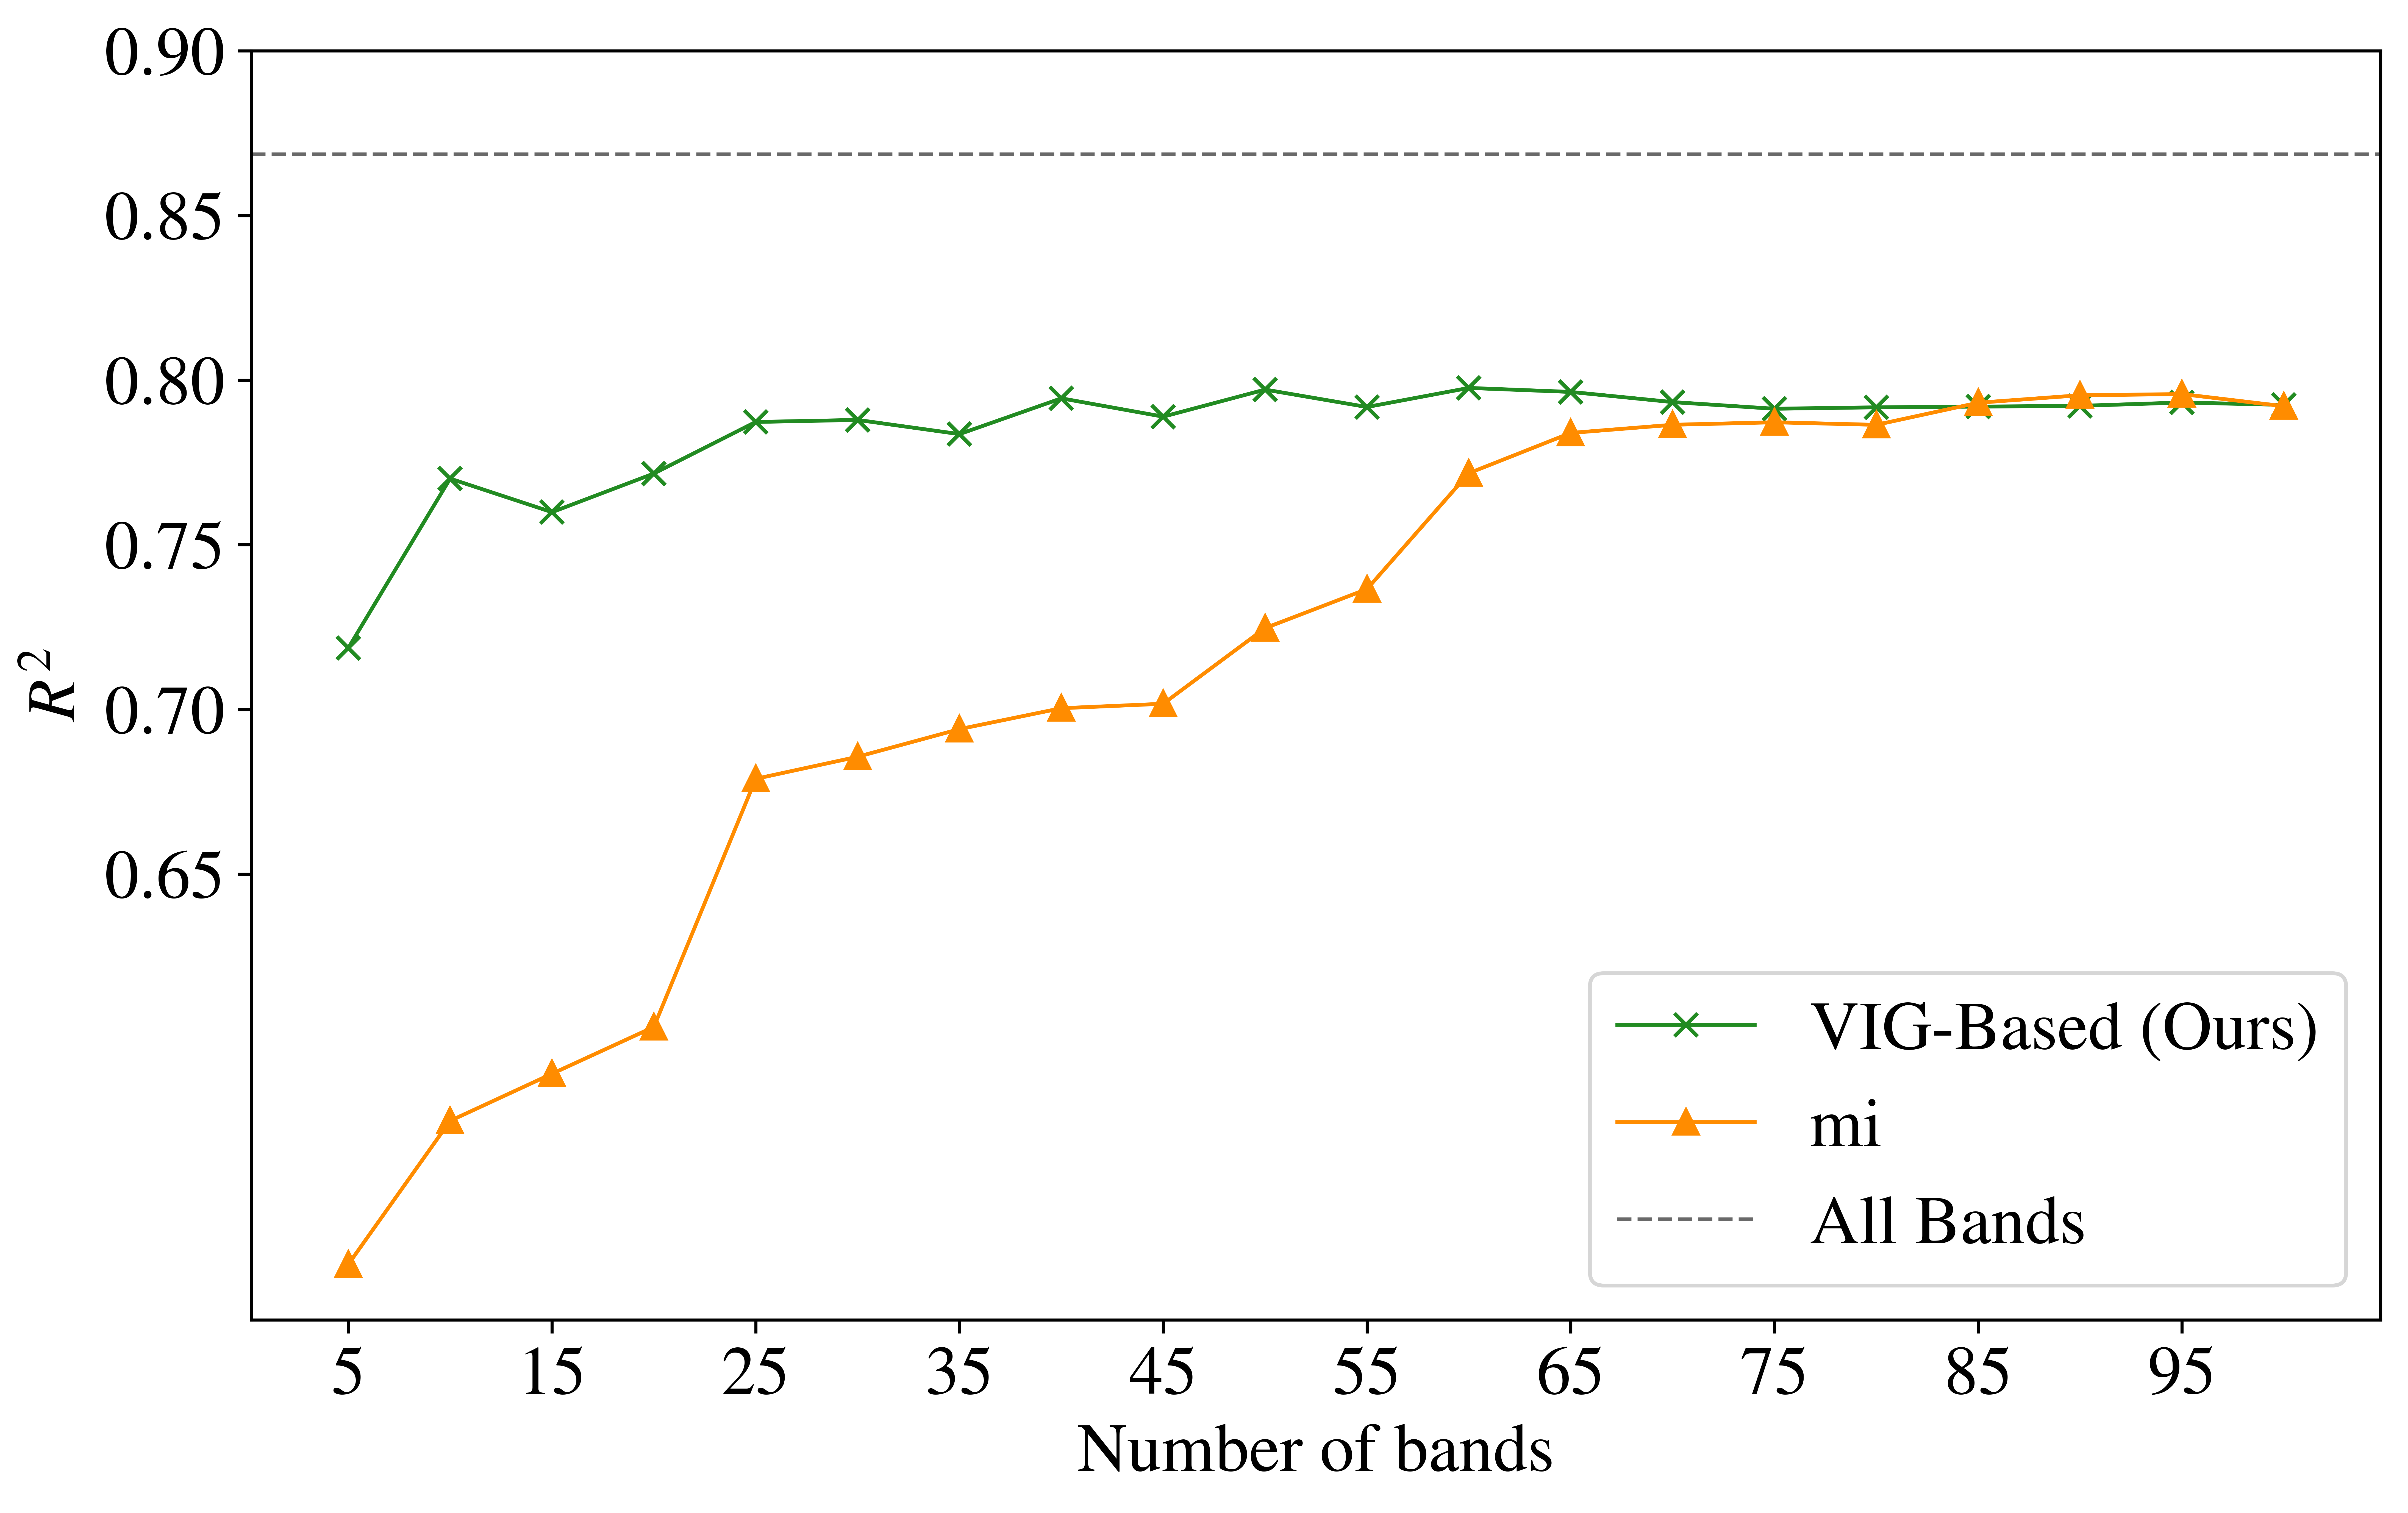

In [18]:
bombs_dir = "mi_pavia_results_test_frac_band_sel_estimators_4"
vig_dir = "gawll_pavia_results_test_frac_band_sel_estimators_4"


import pandas as pd



import numpy as np



global_r2_vig_results = []


global_r2_bombs_results = []



for n_bands in range(5, 103, 5):
    r2_bombs_results, r2_vig_results, r2_mi_results = [], [], []
    r2_random_results = []

    for i in range(20):
        b = pd.read_csv(
            f"{bombs_dir}/n_clusters-{n_bands},test_size-band_sel,random_state-{i}.csv", sep=";"
        )


        v = pd.read_csv(
            f"{vig_dir}/n_clusters-{n_bands},test_size-band_sel,random_state-{i}.csv", sep=";"
        )



        r2_bombs_results.append(b["f1_macro"].item())


        r2_vig_results.append(v["f1_macro"].item())


    global_r2_bombs_results.append(np.mean(np.sort(r2_bombs_results)).item())


    global_r2_vig_results.append(np.mean(np.sort(r2_vig_results)).item())


import matplotlib.pyplot as plt


import numpy as np
import matplotlib



matplotlib.rcParams["mathtext.fontset"] = "stix"

plt.rcParams['font.size'] = 18  # You can adjust this value
matplotlib.rcParams["font.family"] = "STIXGeneral"



# Increase size and quality


fig, ax = plt.subplots(figsize=(10, 6), dpi=1000)



# Create the line plot
ax.plot(
    list(range(5, 103, 5)),
    global_r2_vig_results,
    label=r"VIG-Based (Ours)",
    marker="x",
    color="forestgreen",
    linewidth=1,
)


ax.plot(
    list(range(5, 103, 5)),
    global_r2_bombs_results,
    label=r"mi",
    marker="^",
    color="darkorange",
    linewidth=1,
)





all_bands_r2 = np.mean(

    [
        pd.read_csv(
            f"results_test_frac_band_sel_estimators_4_vig/n_clusters-all,test_size-band_sel,random_state-{i}.csv"
        )["r2_mean"].item()
        for i in range(5)
    ]
)



plt.axhline(
    y=all_bands_r2, color="dimgray", linestyle="--", linewidth=1, label="All Bands"
)



plt.yticks(np.arange(0.65, 0.91, 0.05))
# Add labels and legend
ax.set_xlabel("Number of bands")

plt.xticks(np.arange(5, 103, 10))
ax.set_ylabel("$R^2$")


ax.legend()



# Save the plot to a file (optional)


plt.savefig("r2_plot_final.png", bbox_inches="tight")




# Show the plot


plt.show()